In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

## **Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

## **Final Deliverable**

Your final submission should take the form of a blog post that consists of 10 or more captioned visualizations detailing your most important insights. You will also work on posting the blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data.

Federal Elections Commission - Campaign finance and expenditures.

Federal Aviation Administration - FAA data.

Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis.

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, prepare a PDF containing your notebook with the solutions and your final visualization with the filename:EDA_LastName_FirstName.pdf. Be sure to include the link to access your blog. We will provide more details on the blog during the next week of class.

In [38]:
# Import packages 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sb
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

QUESTIONS 

1) What do we need to be cautious about when analyzing this dataset? 

2) Is the house price of unit area influenced by either house age, distance to the nearest MRT station, or number of convience stores in the area? 

3) What variable has the strongest influence on house price of unit area?


In [39]:
# Read in CSV 

pd.set_option('display.max_columns', None)

frame = pd.read_csv('Real_estate.csv', header=0, index_col=0, usecols=[0,2,3,4,7])
print(frame)
print(frame.info())


     X2 house age  X3 distance to the nearest MRT station  \
No                                                          
1            32.0                                84.87882   
2            19.5                               306.59470   
3            13.3                               561.98450   
4            13.3                               561.98450   
5             5.0                               390.56840   
..            ...                                     ...   
410          13.7                              4082.01500   
411           5.6                                90.45606   
412          18.8                               390.96960   
413           8.1                               104.81010   
414           6.5                                90.45606   

     X4 number of convenience stores  Y house price of unit area  
No                                                                
1                                 10                        37.9  
2    

In [40]:
# Renaming columns 

frame.columns=['house_age','distance_to_nearest_metro', 'number_of_convenience_stores_in_area', 'house_price_of_unit_area']
print(frame)

     house_age  distance_to_nearest_metro  \
No                                          
1         32.0                   84.87882   
2         19.5                  306.59470   
3         13.3                  561.98450   
4         13.3                  561.98450   
5          5.0                  390.56840   
..         ...                        ...   
410       13.7                 4082.01500   
411        5.6                   90.45606   
412       18.8                  390.96960   
413        8.1                  104.81010   
414        6.5                   90.45606   

     number_of_convenience_stores_in_area  house_price_of_unit_area  
No                                                                   
1                                      10                      37.9  
2                                       9                      42.2  
3                                       5                      47.3  
4                                       5                      5

In [41]:
# Descriptive Statistics (MEAN, MEDIAN, VARIANCE, & STANDARD DEV)

mean_house_age = frame['house_age'].mean()
median_house_age = frame['house_age'].median()
var_house_age = frame['house_age'].var()
std_house_age = frame['house_age'].std()
print('house_age MEAN is:', mean_house_age)
print('house_age MEDIAN is:',median_house_age)
print('house_age VARIANCE is:',var_house_age)
print('house_age STD DEV is:',std_house_age, '\n')

mean_metro = frame['distance_to_nearest_metro'].mean()
median_metro = frame['distance_to_nearest_metro'].median()
var_metro = frame['distance_to_nearest_metro'].var()
std_metro = frame['distance_to_nearest_metro'].std()
print('distance_to_nearest_metro MEAN is:', mean_metro)
print('distance_to_nearest_metro MEDIAN is:', median_metro)
print('distance_to_nearest_metro VARIANCE is:', var_metro)
print('distance_to_nearest_metro STD DEV is:', std_metro, '\n')
# NOTE: The mean is MUCH higher than the median, meaning there are heavy outliers or the data is skewed one direction 

mean_convenience_stores = frame['number_of_convenience_stores_in_area'].mean()
median_convenience_stores = frame['number_of_convenience_stores_in_area'].median()
var_convenience_stores = frame['number_of_convenience_stores_in_area'].var()
std_convenience_stores = frame['number_of_convenience_stores_in_area'].std()
print('number_of_convenience_stores_in_area MEAN is:', mean_convenience_stores)
print('number_of_convenience_stores_in_area MEDIAN is:', median_convenience_stores)
print('number_of_convenience_stores_in_area VARIANCE is:', var_convenience_stores)
print('number_of_convenience_stores_in_area STD DEV is:', std_convenience_stores)

house_age MEAN is: 17.71256038647343
house_age MEDIAN is: 16.1
house_age VARIANCE is: 129.7887038401704
house_age STD DEV is: 11.392484533242536 

distance_to_nearest_metro MEAN is: 1083.8856889130436
distance_to_nearest_metro MEDIAN is: 492.2313
distance_to_nearest_metro VARIANCE is: 1592920.6308205703
distance_to_nearest_metro STD DEV is: 1262.1095954078514 

number_of_convenience_stores_in_area MEAN is: 4.094202898550725
number_of_convenience_stores_in_area MEDIAN is: 4.0
number_of_convenience_stores_in_area VARIANCE is: 8.676334350984305
number_of_convenience_stores_in_area STD DEV is: 2.945561805663617


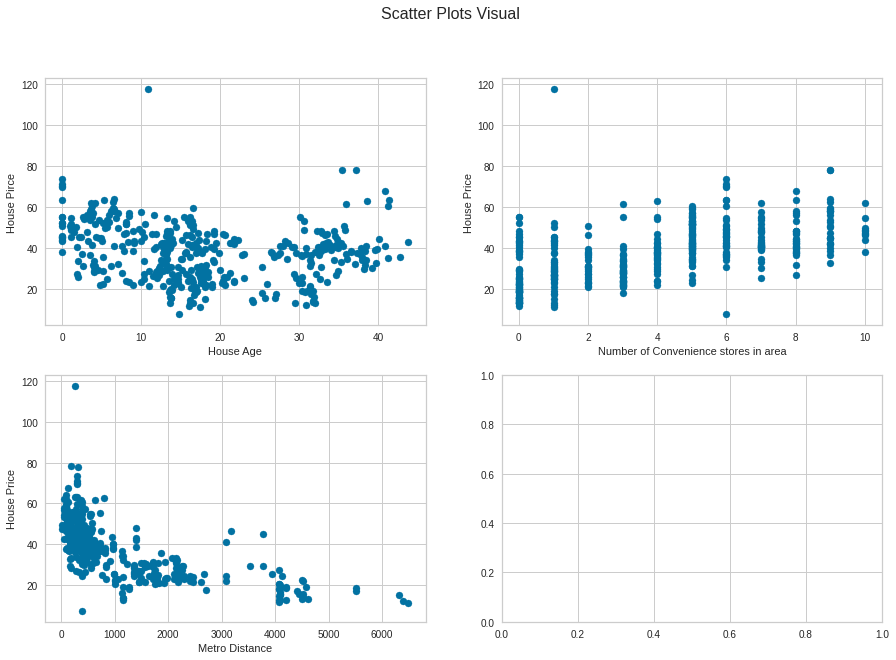

In [64]:
# Getting a visual of the data

fig, myAxes = plt.subplots(2,2, figsize = (15,10))

x = frame['house_age']
x2 = frame['distance_to_nearest_metro']
x3 = frame['number_of_convenience_stores_in_area']
y = frame['house_price_of_unit_area']

myAxes[0,0].scatter(x,y)
myAxes[1,0].scatter(x2,y)
myAxes[0,1].scatter(x3,y)

# Adds title
fig.suptitle('Scatter Plots Visual', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0,0], xlabel='House Age')
plt.setp(myAxes[0,0], ylabel='House Pirce')
plt.setp(myAxes[1,0], xlabel='Metro Distance')
plt.setp(myAxes[1,0], ylabel='House Price')
plt.setp(myAxes[0,1], xlabel='Number of Convenience stores in area')
plt.setp(myAxes[0,1], ylabel='House Price')

# Saving graph
plt.savefig('GENERAL VISUALS_1', dpi=200)

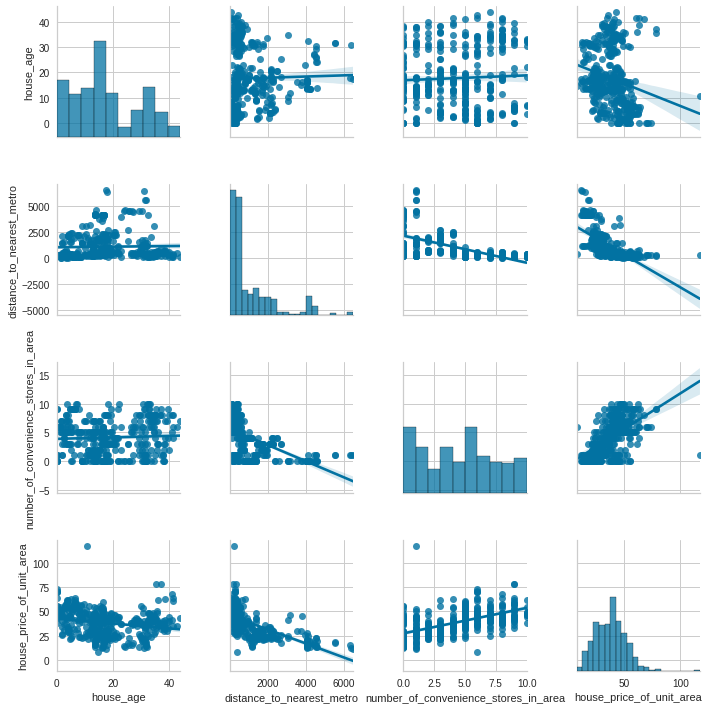

In [61]:
# Testing to see if there are any strong correlations between variables/features

sb.pairplot(frame, kind='reg')
plt.savefig('ALL VARIABLES', dpi=200)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


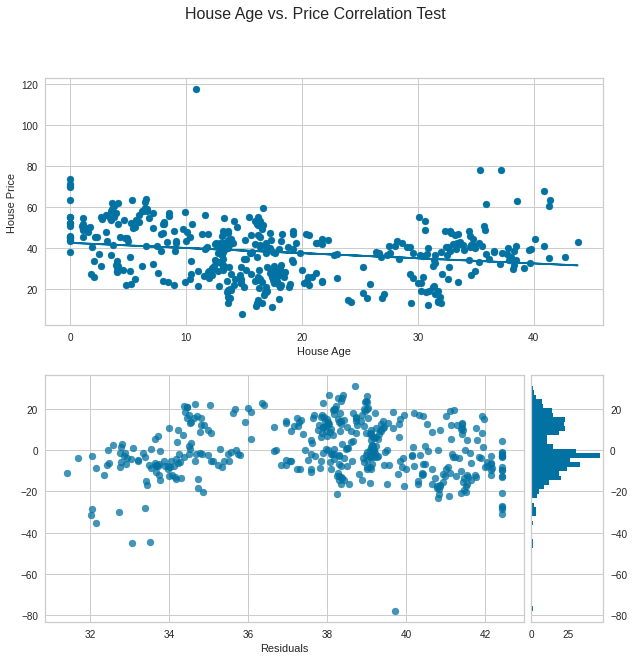

In [60]:
# Running Linear Regression for 'house_age'

model = LinearRegression()
x = frame['house_age']
X = x[:, np.newaxis]
y = frame['house_price_of_unit_area']
model.fit(X,y)

# Create subplots
fig, myAxes = plt.subplots(2,1, figsize = (10,10))

y_predicted = model.predict(X)
myAxes[0].scatter(x,y)
myAxes[0].plot(x,y_predicted)

# Adds title
fig.suptitle('House Age vs. Price Correlation Test', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0], xlabel='House Age')
plt.setp(myAxes[0], ylabel='House Price')
plt.setp(myAxes[1], xlabel='Residuals')

# Residuals Visualizer 
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)

# Save graph
plt.savefig('House Age Correlation Graph', dpi=200)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


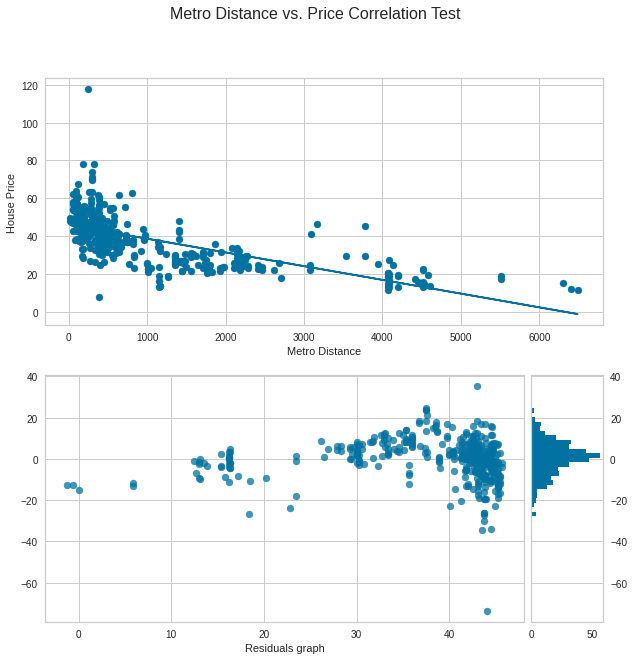

In [58]:
# Running Linear Regression for 'Distance to nearest metro'

model = LinearRegression()
x = frame['distance_to_nearest_metro']
X = x[:, np.newaxis]
y = frame['house_price_of_unit_area']
model.fit(X,y)

# Create subplots
fig, myAxes = plt.subplots(2,1, figsize = (10,10))

y_predicted = model.predict(X)
myAxes[0].scatter(x,y)
myAxes[0].plot(x,y_predicted)

# Adds title
fig.suptitle('Metro Distance vs. Price Correlation Test', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0], xlabel='Metro Distance')
plt.setp(myAxes[0], ylabel='House Price')
plt.setp(myAxes[1], xlabel='Residuals graph')

# Residuals Visualizer 
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)

# Save graph
plt.savefig('Metro Distance Correlation', dpi=200)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


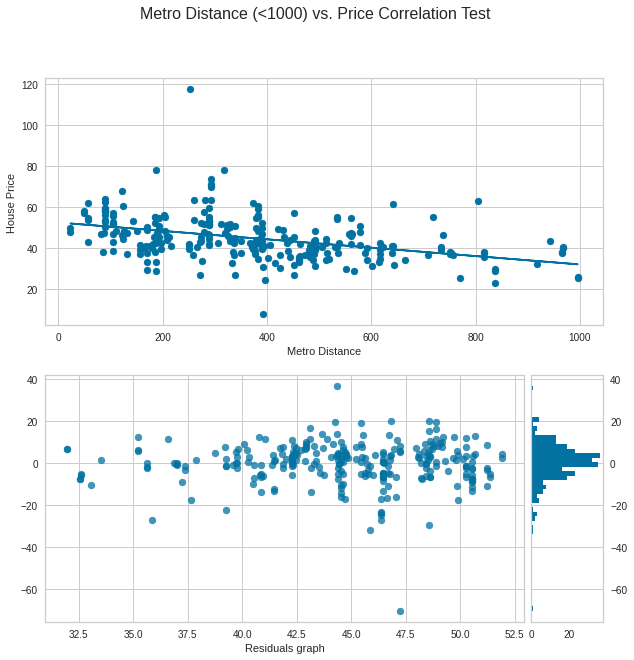

In [70]:
# Linear Regression for metro < 1000

frame2 = frame[frame['distance_to_nearest_metro'] < 1000]

model = LinearRegression()
x = frame2['distance_to_nearest_metro']
X = x[:, np.newaxis]
y = frame2['house_price_of_unit_area']
model.fit(X,y)

# Create subplots
fig, myAxes = plt.subplots(2,1, figsize = (10,10))

y_predicted = model.predict(X)
myAxes[0].scatter(x,y)
myAxes[0].plot(x,y_predicted)

# Adds title
fig.suptitle('Metro Distance (<1000) vs. Price Correlation Test', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0], xlabel='Metro Distance')
plt.setp(myAxes[0], ylabel='House Price')
plt.setp(myAxes[1], xlabel='Residuals graph')

# Residuals Visualizer 
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)

# Save graph
plt.savefig('Metro Distance Correlation (<1000)', dpi=200)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


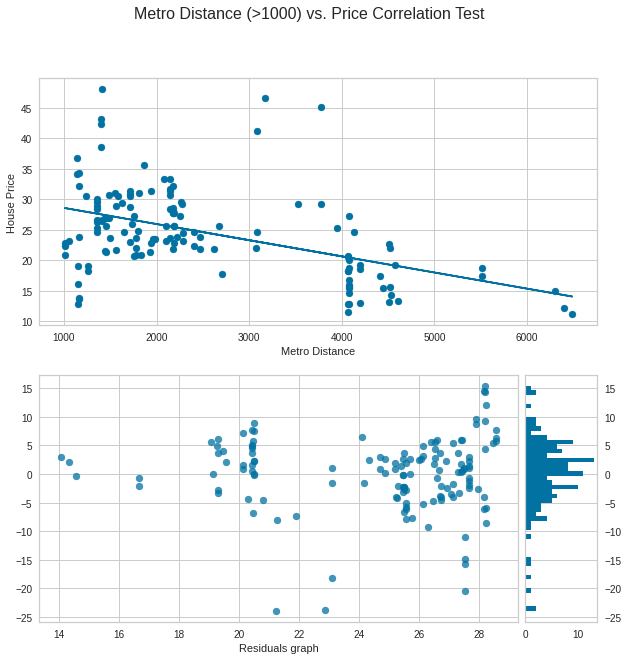

In [72]:
# Linear Regression for metro > 1000

frame3 = frame[frame['distance_to_nearest_metro'] > 1000]

model = LinearRegression()
x = frame3['distance_to_nearest_metro']
X = x[:, np.newaxis]
y = frame3['house_price_of_unit_area']
model.fit(X,y)

# Create subplots
fig, myAxes = plt.subplots(2,1, figsize = (10,10))

y_predicted = model.predict(X)
myAxes[0].scatter(x,y)
myAxes[0].plot(x,y_predicted)

# Adds title
fig.suptitle('Metro Distance (>1000) vs. Price Correlation Test', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0], xlabel='Metro Distance')
plt.setp(myAxes[0], ylabel='House Price')
plt.setp(myAxes[1], xlabel='Residuals graph')

# Residuals Visualizer 
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)

# Save graph
plt.savefig('Metro Distance Correlation (>1000)', dpi=200)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


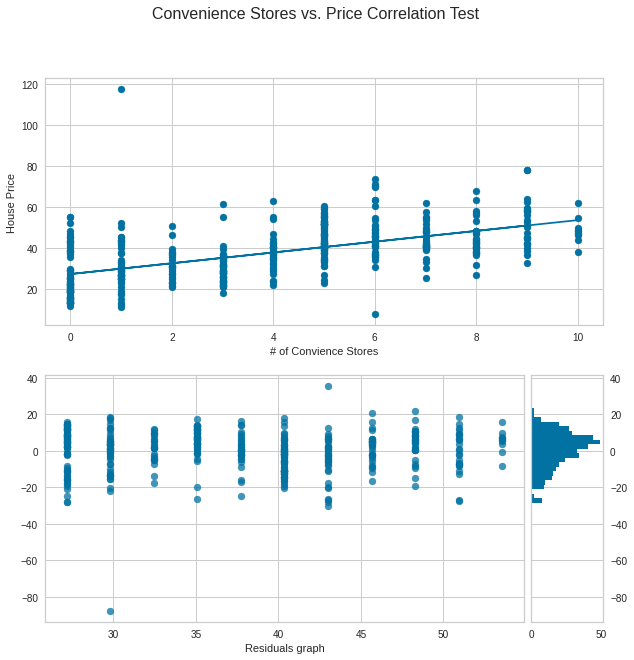

In [74]:
# Running Linear Regression for 'number_of_convenience_stores_in_area'

model = LinearRegression()
x = frame['number_of_convenience_stores_in_area']
X = x[:, np.newaxis]
y = frame['house_price_of_unit_area']
model.fit(X,y)

# Create subplots
fig, myAxes = plt.subplots(2,1, figsize = (10,10))

y_predicted = model.predict(X)
myAxes[0].scatter(x,y)
myAxes[0].plot(x,y_predicted)

# Adds title
fig.suptitle('Convenience Stores vs. Price Correlation Test', fontsize=16)

# Adds axes labels
plt.setp(myAxes[0], xlabel='# of Convience Stores')
plt.setp(myAxes[0], ylabel='House Price')
plt.setp(myAxes[1], xlabel='Residuals graph')

# Residuals Visualizer 
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)

# Save graph
plt.savefig('Convenience stores', dpi=200)

plt.show()